In [14]:
import os
print(os.getcwd())

C:\Users\Riccardo\Documents\GitHub\DWM-Project\progetto DWM finito


In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import seaborn as sb

from sklearn import neighbors
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import explained_variance_score, r2_score

from sklearn.decomposition import PCA

In [16]:
data = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [17]:
print("data.shape:", data.shape)
print("data.index:", data.index)
print("data.columns:", data.columns)
print("data_test.columns:", data_test.columns)

data.shape: (3000, 23)
data.index: RangeIndex(start=0, stop=3000, step=1)
data.columns: Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')
data_test.columns: Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew'],
      dtype='object')


# Pulizia dei dati

In [18]:
data.drop(['homepage'],axis=1,inplace=True)

In [19]:
data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [20]:
def convertAll(data):
    import math
    import datetime

    data["release_date"] = pd.to_datetime(data["release_date"])
    #fix della data in quanto ci sono date che superano il 2021
    i=0
    maxDate = datetime.datetime(2020, 1, 1)
    n_elem = data.shape[0]
    while i<n_elem:
        if data['release_date'][i]>maxDate:
            new_year=(data['release_date'][i].year)-100
            new_date = datetime.datetime(new_year, data['release_date'][i].month, data['release_date'][i].day, 0, 0, 0)
            data['release_date'][i] = new_date
        i+=1
    i=0
    n_elem = data.shape[0]
    while i<n_elem:
        if isinstance(data["genres"][i], float):
            if math.isnan(data["genres"][i]):
                i+=1
                continue
        data["genres"][i]=eval(data["genres"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["production_countries"][i], float):
            if math.isnan(data["production_countries"][i]):
                i+=1
                continue
        data["production_countries"][i]=eval(data["production_countries"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["spoken_languages"][i], float):
            if math.isnan(data["spoken_languages"][i]):
                i+=1
                continue
        data["spoken_languages"][i]=eval(data["spoken_languages"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["Keywords"][i], float):
            if math.isnan(data["Keywords"][i]):
                i+=1
                continue
        data["Keywords"][i]=eval(data["Keywords"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["cast"][i], float):
            if math.isnan(data["cast"][i]):
                i+=1
                continue
        data["cast"][i]=eval(data["cast"][i]) 
        i+=1

    i=0
    while i<n_elem:
        if isinstance(data["crew"][i], float):
            if math.isnan(data["crew"][i]):
                i+=1
                continue
        data["crew"][i]=eval(data["crew"][i]) 
        i+=1

    i=0
    while i<n_elem:
        if isinstance(data["production_companies"][i], float):
            if math.isnan(data["production_companies"][i]):
                i+=1
                continue
        data["production_companies"][i]=eval(data["production_companies"][i])
        i+=1


In [21]:
convertAll(data)
convertAll(data_test)

<ipython-input-20-b2a67e616a86>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['release_date'][i] = new_date
<ipython-input-20-b2a67e616a86>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["genres"][i]=eval(data["genres"][i])
<ipython-input-20-b2a67e616a86>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["production_countries"][i]=eval(data["production_countries"][i])
<ipython-input-20-b2a67e616a86>:41: SettingWit

In [22]:
# Creazione colonna indicante il mese di uscita del film
data["release_month"]=data["release_date"].dt.month

In [23]:
# Creazione della colonna indicante se la lingua originale del film è inglese o meno
data["lingua_inglese"] = 0

i=0
n_elem = data.shape[0]
while i<n_elem:
    if data["original_language"][i]=="en":
        data["lingua_inglese"][i]=1
    else:
        data["lingua_inglese"][i]=0
    i+=1

data["lingua_inglese"]

data_test["lingua_inglese"] = 0
i=0
n_elem = data_test.shape[0]
while i<n_elem:
    if data_test["original_language"][i]=="en":
        data_test["lingua_inglese"][i]=1
    else:
        data_test["lingua_inglese"][i]=0
    i+=1

<ipython-input-23-82f7bee93042>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lingua_inglese"][i]=1
<ipython-input-23-82f7bee93042>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lingua_inglese"][i]=0
<ipython-input-23-82f7bee93042>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["lingua_inglese"][i]=0
<ipython-input-23-82f7bee93042>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [24]:
# sostituzione dei valori NaN nella colonna runtime con la media

i=0
n_elem = data.shape[0]
media = data["runtime"].describe()['mean']
while i<n_elem:
    if math.isnan(data["runtime"][i]):
        data["runtime"][i] = media
        print(data["id"][i])
    i+=1


1336
2303


<ipython-input-24-f0422e3bbf6e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["runtime"][i] = media


In [25]:
# Creazione della colonna indicante se il film è stato diretto da un regista famoso
most_famous_director = ["Francis Ford Coppola", "Steven Spielberg", "Irvin Kershner", "Frank Darabont", "Martin Scorsese", "Stanley Donen", "Gene Kelly", "Quentin Tarantino", "David Fincher", "Billy Wilder", "Roman Polanski", "Sergio Leone", "Christopher Nolan", "Stanley Kubrick", "Michael Curtiz", "Ridley Scott", "Carol Reed", "George Lucas", "Robert Zemeckis", "Peter Jackson", "Sergio Leone", "Stanley Kubrick", "Billy Wilder", "Orson Welles", "John McTiernan", "James Cameron", "Victor Fleming", "Sam Wood", "George Cukor", "George Roy Hill", "Ridley Scott", "Andrej Tarkovskij", "Stanley Kubrick", "Michael Mann", "Larry Wachowski", "Alfred Hitchcock", "François Truffaut", "Robert Hamer", "Ethan Coen", "Elia Kazan", "Rob Reiner", "Sam Raimi", "Akira Kurosawa"]

data["famous_director"] = 0
index_row = 0
index_list = 0
while index_row < len(data["crew"]):
    if data["crew"][index_row]==data["crew"][index_row]:
        while index_list < len(data["crew"][index_row]):
            if data["crew"][index_row][index_list]["job"] == 'Director':
                if data["crew"][index_row][index_list]["name"] in most_famous_director:
                    data["famous_director"][index_row] = 1
            index_list+=1
    index_list = 0
    index_row+=1


<ipython-input-25-b4ce96cbf837>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["famous_director"][index_row] = 1


In [26]:
#aggiunta la colonna anno di uscita
#per evitare errori usare il .dt per estrarre info dalle date
data["release_year"]=data["release_date"].dt.year


## Normalizzazione con logaritmo di revenue, budget e popularity

In [27]:
data['budgetLOG']= np.log(data["budget"])
data['popularityLOG']=np.log(data["popularity"])
data['revenueLOG']=np.log(data["revenue"])

C:\Users\Riccardo\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:
data["release_date"] = pd.to_datetime(data["release_date"])

i=0
n_elem = data.shape[0]
while i<n_elem:
    if data['budgetLOG'][i]<=np.finfo(np.float64).min:
        data['budgetLOG'][i]=0
    if data['popularityLOG'][i]<=np.finfo(np.float64).min:
        data['popularityLOG'][i]=0 
    if data['revenueLOG'][i]<=np.finfo(np.float64).min:
        data['revenueLOG'][i]=0    
    i+=1


<ipython-input-28-1f248ef688f1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['budgetLOG'][i]=0


# Predizione

## KNN

In [29]:
# fa il tuning dei parametri per l'algoritmo
def tuning_knn(max_neighbors, function_of_MinKowski = 2, custom_fun = None, font_size = 1):
    sb.set(font_scale = font_size)
    df_knn = pd.DataFrame(columns = ["Neighbors", "Score", "Bias", "Variance"]) #creo il df per inserire i valori per ogni ciclo di for
    for i in range(1, max_neighbors + 1):
        if custom_fun == None: 
            knn = KNeighborsRegressor(n_neighbors = i, p = function_of_MinKowski)
        else:
            knn = KNeighborsRegressor(n_neighbors = i, metric = custom_fun)
        knn.fit(x_train, y_train) #train
        y_predict = knn.predict(x_validate) #predict
        # inserisco nel df i dati della predizione
        df_knn = df_knn.append({"Neighbors" : i, "Score" : knn.score(x_validate, y_validate), 
                                "Bias" : np.mean((np.mean(y_predict) - y_validate)**2), "Variance" : np.var(y_predict)}, ignore_index = True)
    #grafici riguardanti il tuning dei parametri    
    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(17,5))
    sb.lineplot(ax = axs[0], data = df_knn, x = "Neighbors", y = df_knn.columns[1])
    sb.lineplot(ax = axs[1], data = df_knn, x = "Neighbors", y = df_knn.columns[2])
    sb.lineplot(ax = axs[2], data = df_knn, x = "Neighbors", y = df_knn.columns[3])
   
    return df_knn

In [17]:
#dato il df trovo la miglior predizione e faccio un summary di grafici
def summary_knn_best(df_knn, function_of_MinKowski = 2, custom_fun = None):
    sb.set(font_scale = 1.5) #modifico la scala
    print(df_knn.iloc[df_knn["Score"].idxmax()]) #print dei parametri per il miglior tuning dell'algoritmo
    if custom_fun == None: # istanzio l'algoritmo senza custom_fun
        knn = KNeighborsRegressor(n_neighbors = int(df_knn.iloc[df_knn["Score"].idxmax()]["Neighbors"]),
                                  p = function_of_MinKowski)
    else: # istanzio l'algoritmo con custom_fun
        knn = KNeighborsRegressor(n_neighbors = int(df_knn.iloc[df_knn["Score"].idxmax()]["Neighbors"]),
                                  metric = custom_fun)
    knn.fit(x_train, y_train) # train
    # creo un summary di grafici per la miglior predizione
    fig = plt.figure(constrained_layout = False, figsize=(20,20)) # creo la figura
    gs = fig.add_gridspec(1,3) # creo la griglia di grafici, 1 riga e 3 colonne

    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(17,5))
    sb.lineplot(ax = axs[0], data = df_knn, x = "Neighbors", y = df_knn.columns[1])
    axs[0].axvline(x = int(df_knn.iloc[df_knn["Score"].idxmax()]["Neighbors"]), color = "red", #retta verticale per il n di vicini scelti
                   linestyle = ":", label = "Miglior previsione")
    axs[0].legend()
    sb.lineplot(ax = axs[1], data = df_knn, x = "Neighbors", y = df_knn.columns[2])
    axs[1].axvline(x = int(df_knn.iloc[df_knn["Score"].idxmax()]["Neighbors"]), color = "red", #retta verticale per il n di vicini scelti
                   linestyle = ":", label = "Miglior previsione")
    axs[1].legend()
    sb.lineplot(ax = axs[2], data = df_knn, x = "Neighbors", y = df_knn.columns[3])
    axs[2].axvline(x = int(df_knn.iloc[df_knn["Score"].idxmax()]["Neighbors"]), color = "red", #retta verticale per il n di vicini scelti
                   linestyle = ":", label = "Miglior previsione")
    axs[2].legend()


    # setta la posizione dei subplot
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.05, right=1.05, hspace=0.25,
                    wspace=0.5)
    sb.set(font_scale = 1) #riporto la scala all'originale

In [45]:
trasf=StandardScaler()

features = ['budget','popularity','runtime','lingua_inglese', 'release_year','famous_director', "release_month", "revenue"]
dataPred=data[features]
dataPred=pd.DataFrame(columns = dataPred.columns, data = trasf.fit_transform(dataPred))

X=dataPred.iloc[:,0:7]
y=dataPred.iloc[:,7]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)


### KNN con Distanza Euclidea:

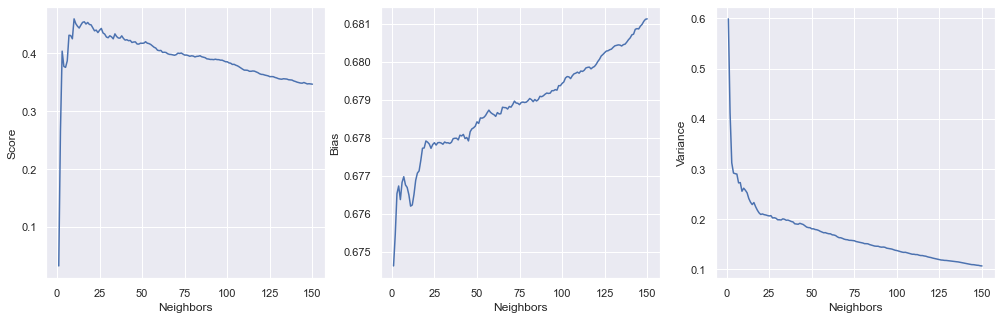

In [50]:
df_knn_e = tuning_knn(150)

Neighbors    10.000000
Score         0.459995
Bias          0.676498
Variance      0.261560
Name: 9, dtype: float64


<Figure size 1440x1440 with 0 Axes>

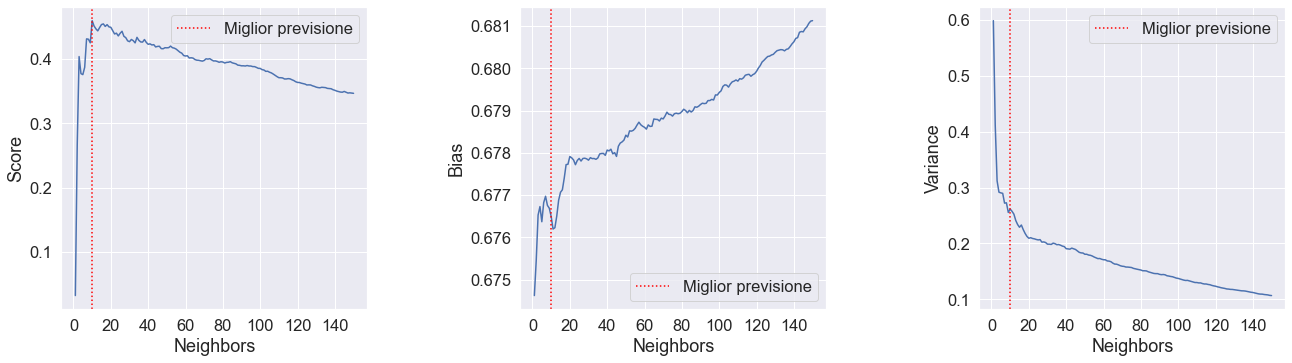

In [51]:
summary_knn_best(df_knn_e)

### KNN con Distanza di Manhattan:

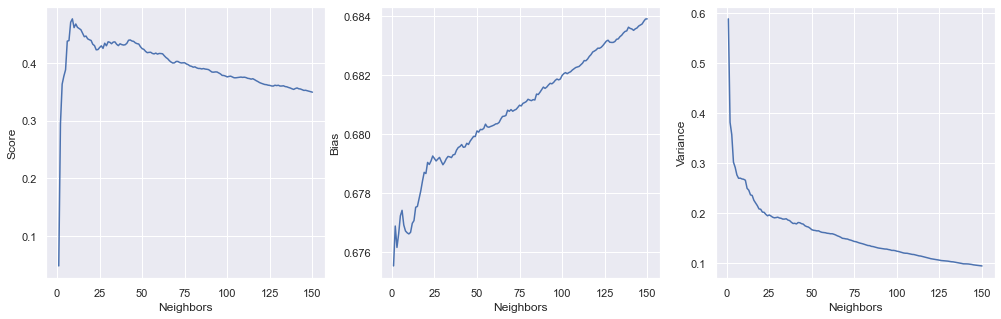

In [48]:
df_knn_md = tuning_knn(150, 1)

Neighbors    9.000000
Score        0.476831
Bias         0.676650
Variance     0.268861
Name: 8, dtype: float64


<Figure size 1440x1440 with 0 Axes>

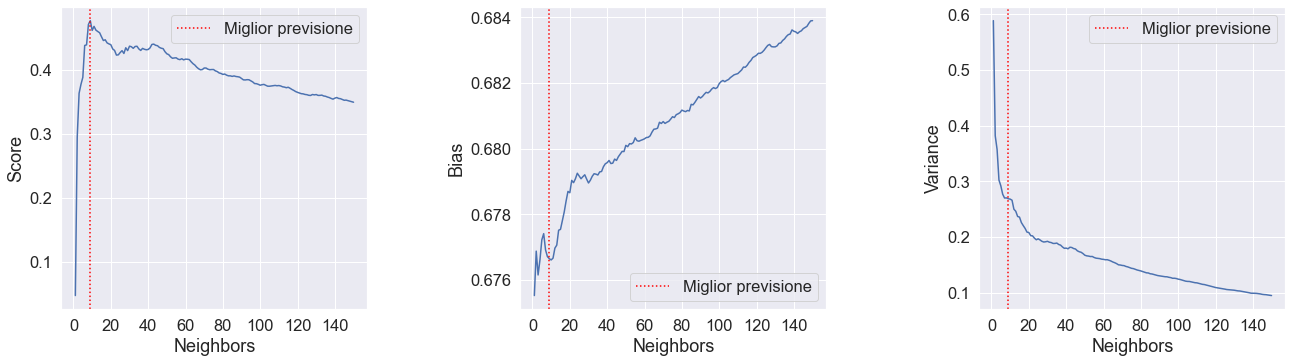

In [49]:
summary_knn_best(df_knn_md)

## LINEAR REGRESSION

In [30]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

datasetTrainLinear = data[["revenue", "budget", "runtime", "popularity", "release_month", "lingua_inglese"]].astype(float).values
features = ["budget", "runtime", "popularity", "release_month", "lingua_inglese", "revenue"]

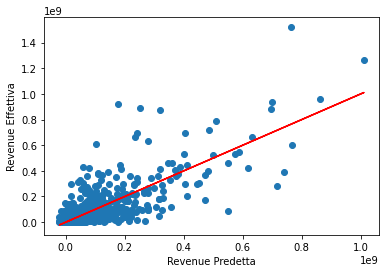

0.616116734258191

In [39]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

dataPred=data[features]
X=dataPred.iloc[:,0:5]
y=dataPred.iloc[:,5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34)

lreg=LinearRegression()

lreg.fit(X_train, y_train)

y_pred=lreg.predict(X_test)

plt.scatter(y_pred, y_test)
plt.plot(y_pred, y_pred, color='red')
plt.xlabel("Revenue Predetta")
plt.ylabel("Revenue Effettiva")
plt.show()

score=lreg.score(X_train, y_train)
score

In [32]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error

for d in [2,4,8,16]:
    # prepare the data
    train_size = int(data.shape[0]*0.66) -1
    poly = PolynomialFeatures(d, include_bias=False)
    poly.fit(X_train)
    X_train_2 = poly.transform(X_train)

    # train the model
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train_2, y_train)

    y_pred = model.predict(poly.transform(X))

    print ("Polynomial degree:", d)
    print ("Train Error: {:.3f}".format( mean_squared_error(y_true = y_train, 
                                              y_pred = y_pred[:train_size])) )
    print ("Test Error : {:.3f}".format( mean_squared_error(y_true = y_test,  
                                              y_pred = y_pred[train_size:])) )
    print ()

Polynomial degree: 2
Train Error: 30380736418855092.000
Test Error : 30474252070619408.000

Polynomial degree: 4
Train Error: 30268466801075048.000
Test Error : 29046560997207920.000

Polynomial degree: 8
Train Error: 24120107465459832.000
Test Error : 27345002647678276.000

Polynomial degree: 16
Train Error: 20103537154709996.000
Test Error : 22617206509566436.000



Aumentando il grado del polinomio, non migliora la nostra predizione

# PCA

In [26]:
dataPred=data[features]
X=dataPred.iloc[:,0:5]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
print(scaled_data)

[[-0.23045256 -0.67299251 -0.15599768 -1.40098803  0.40626167]
 [ 0.47187212  0.23299381 -0.01771439  0.3592929   0.40626167]
 [-0.51948618 -0.12940071  4.61384865  0.94605321  0.40626167]
 ...
 [ 1.14718432  0.55008903  0.49736238  0.94605321  0.40626167]
 [ 0.5258971  -0.80889046  0.6000891  -1.69436819  0.40626167]
 [ 0.33680969 -0.0841014   0.16929745  0.65267305  0.40626167]]


In [27]:
features = ["budget", "runtime", "popularity", "release_month", "lingua_inglese", "revenue"]

pca = PCA() # this will create as many components 
            # as the number of features
pca.fit(scaled_data)  # note this matrix is [samples x dimentions]
pca.components_

array([[ 0.64464643,  0.40510627,  0.57000727,  0.12682664,  0.28164978],
       [-0.06883771,  0.59510503, -0.16023998,  0.50409645, -0.60110007],
       [ 0.06963347,  0.20024622,  0.21735315, -0.7910604 , -0.53106844],
       [-0.14978239, -0.51585498,  0.66794986,  0.31391115, -0.4083646 ],
       [-0.74324206,  0.41896778,  0.39498791, -0.07406085,  0.33250078]])

In [28]:
# project data onto the selected components
X_proj = pca.transform(scaled_data)

print ( X_proj.shape )
print ( X_proj[:10] )

(3000, 5)
[[-0.57337281 -1.31007735  0.70779539 -0.32820301  0.06654335]
 [ 0.54847203  0.04592611 -0.42431119 -0.25581831 -0.15162249]
 [ 2.47702959 -0.54787164 -0.02338905  3.35745521  2.21932051]
 [-1.19473516  1.41221067  2.17658496  0.12140889 -0.21231906]
 [-1.42170997  1.18555608  2.33372237  0.01577062 -0.30856814]
 [-0.91280837 -0.60392568 -0.89143475  0.16042893 -0.32350354]
 [-0.33498105 -0.45909915 -0.680993    0.28698385 -0.05959495]
 [-1.23743215 -1.61330063  0.74881422 -0.40868753  0.04754011]
 [-0.67330139 -1.09966984  0.75083239 -0.41708432  0.49114517]
 [-0.76461481 -1.02813146  0.17625819 -0.16996148  0.08362171]]


In [29]:
# move data back to the original space
X_approx = pca.inverse_transform(X_proj)
X_approx.shape

(3000, 5)

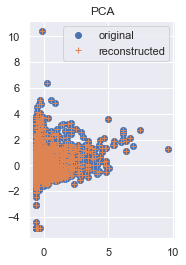

In [30]:
ig, ax = plt.subplots()

ax.plot( scaled_data[:,0], scaled_data[:,1], 'o', label="original" )

ax.plot( X_approx[:,0], X_approx[:,1], '+', label="reconstructed" )

ax.set_title("PCA")
ax.set_aspect('equal')
ax.legend()

## ADA BOOST

In [56]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

def tuning_ada(best_dt, n, loss = "linear"):
    df_dt = pd.DataFrame(columns = ["N modelli", "Score", "Bias", "Variance"]) #creo df
    for model in range(2, n + 1):
        ada = AdaBoostRegressor(best_dt, n_estimators = model, loss = loss)
        ada.fit(x_train, y_train)
        y_predict = ada.predict(x_validate)
        df_dt = df_dt.append({"N modelli" : model, "Score" : ada.score(x_validate, y_validate), 
                              "Bias" : np.mean((np.mean(y_predict) - y_validate)**2), "Variance" : np.var(y_predict)}, ignore_index = True)
    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(20,8))
    sb.lineplot(ax = axs[0], data = df_dt, x = "N modelli", y = df_dt.columns[1])
    sb.lineplot(ax = axs[1], data = df_dt, x = "N modelli", y = df_dt.columns[2])
    sb.lineplot(ax = axs[2], data = df_dt, x = "N modelli", y = df_dt.columns[3])
    
    return df_dt

In [57]:
def summary_best_ada(df_dt, best_dt, loss = "linear"):
    sb.set(font_scale = 1.5) #modifico la scala
    print(df_dt.iloc[df_dt["Score"].idxmax()])
    ada = AdaBoostRegressor(best_dt, n_estimators = int(df_dt.iloc[df_dt["Score"].idxmax()]["N modelli"]), loss = loss)
    ada.fit(x_train, y_train)
    # plotto il miglior risultato

    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(17,5))
    sb.lineplot(ax = axs[0], data = df_dt, x = "N modelli", y = df_dt.columns[1])
    axs[0].axvline(x = int(df_dt.iloc[df_dt["Score"].idxmax()]["N modelli"]), color = "red",
                   linestyle = ":", label = "Miglior previsione")
    axs[0].legend()
    sb.lineplot(ax = axs[1], data = df_dt, x = "N modelli", y = df_dt.columns[2])
    axs[1].axvline(x = int(df_dt.iloc[df_dt["Score"].idxmax()]["N modelli"]), color = "red",
                   linestyle = ":", label = "Miglior previsione")
    axs[1].legend()
    sb.lineplot(ax = axs[2], data = df_dt, x = "N modelli", y = df_dt.columns[3])
    axs[2].axvline(x = int(df_dt.iloc[df_dt["Score"].idxmax()]["N modelli"]), color = "red",
                   linestyle = ":", label = "Miglior previsione")
    axs[2].legend()
        
    # setta la posizione dei subplot
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.05, right=1.05, hspace=0.25,
                    wspace=0.5)
    sb.set(font_scale = 1) #riporto la scala all'originale

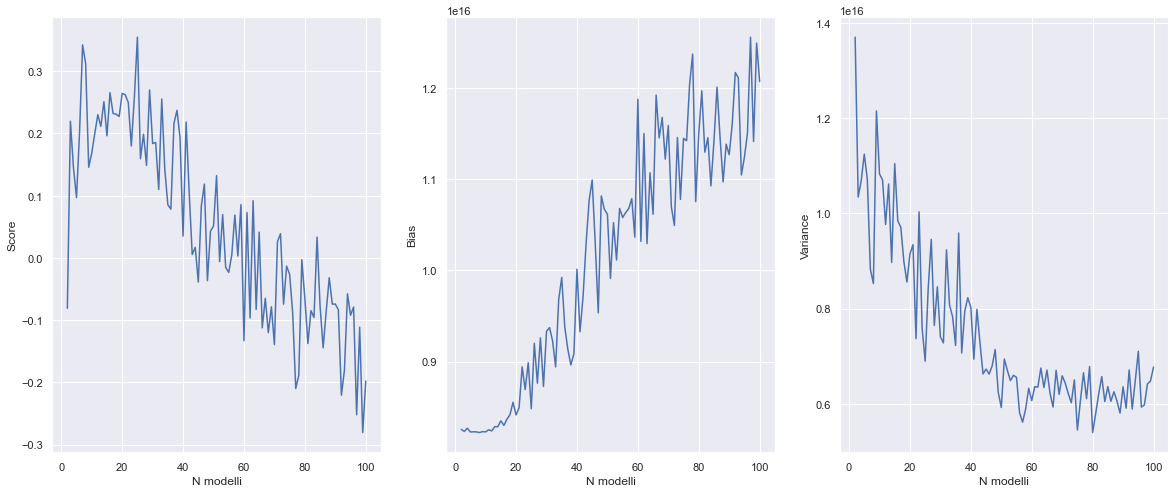

In [58]:
# Ada Boost senza Standard Scaler con valori non normalizzati

num_var=['budget','popularity','runtime','lingua_inglese','famous_director','release_year', 'release_month']

X=data.loc[:,num_var]
y=data['revenue']

x_train,x_test,y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)


df_ada_l = tuning_ada(DecisionTreeRegressor(max_leaf_nodes = 14, max_depth= 4, criterion = "mae"), 100)

N modelli    2.500000e+01
Score        3.547517e-01
Bias         8.483074e+15
Variance     6.894829e+15
Name: 23, dtype: float64


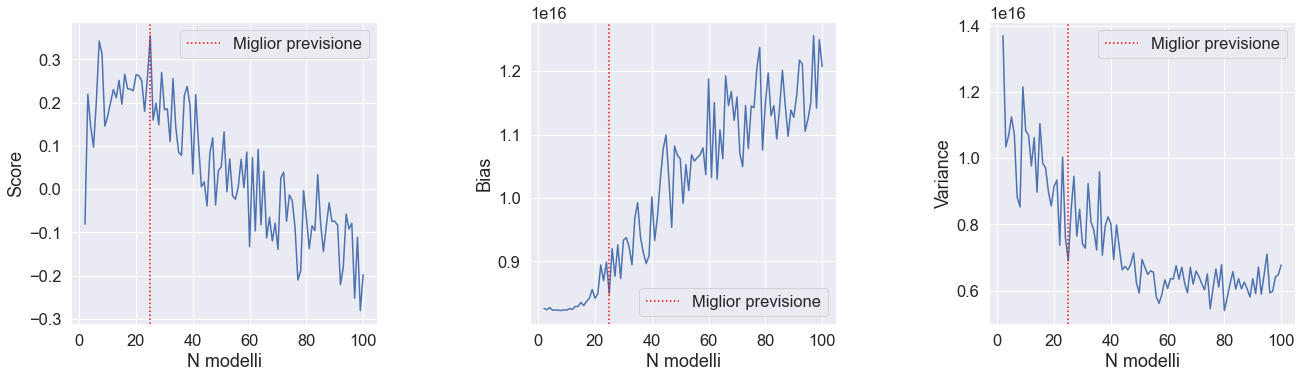

In [59]:
s_b_ada=summary_best_ada(df_ada_l, DecisionTreeRegressor(max_leaf_nodes = 14, max_depth= 4, criterion = "mae"), loss = "square")

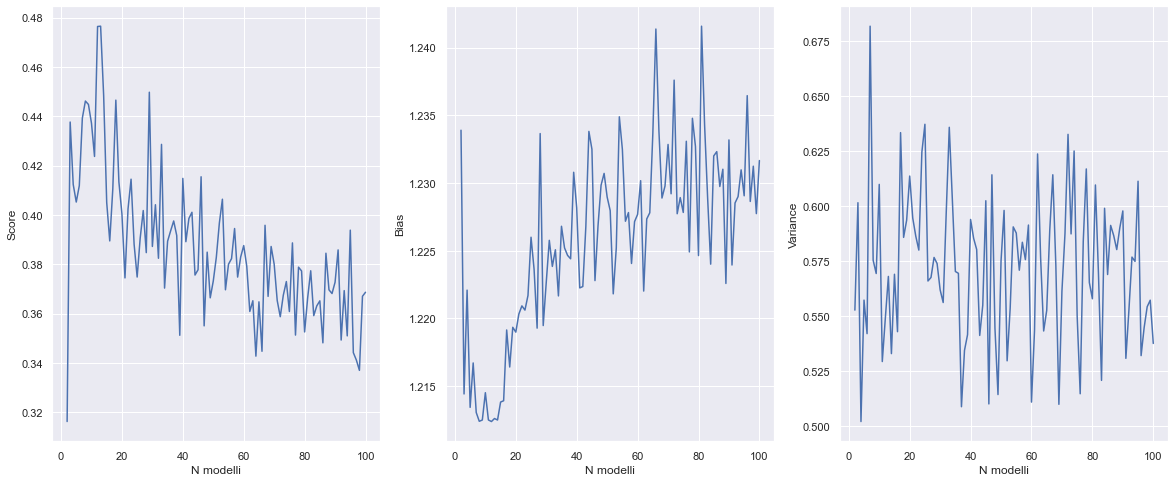

In [60]:
#AdaBoost senza Standard Scaler con valori normalizzati


features = ["budgetLOG","runtime","popularityLOG", "release_month","release_year", "lingua_inglese","famous_director", "revenueLOG"]
dataPred=data[features]
dataPred=pd.DataFrame(columns = dataPred.columns, data = trasf.fit_transform(dataPred))

X=dataPred.iloc[:,0:7]
y=dataPred.iloc[:,7]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

df_ada_l = tuning_ada(DecisionTreeRegressor(max_leaf_nodes = 14, max_depth= 4, criterion = "mae"), 100)


N modelli    13.000000
Score         0.476504
Bias          1.212606
Variance      0.568056
Name: 11, dtype: float64


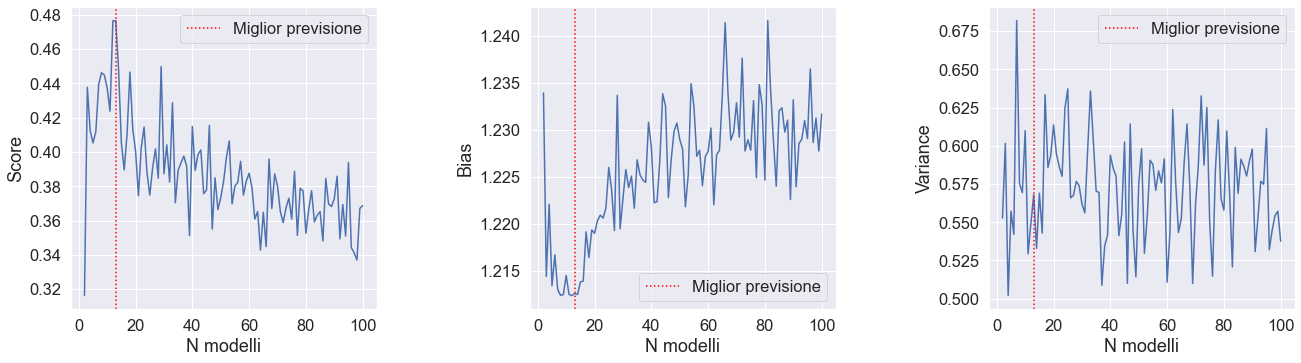

In [61]:
s_b_ada=summary_best_ada(df_ada_l, DecisionTreeRegressor(max_leaf_nodes = 14, max_depth= 4, criterion = "mae"), loss = "square")

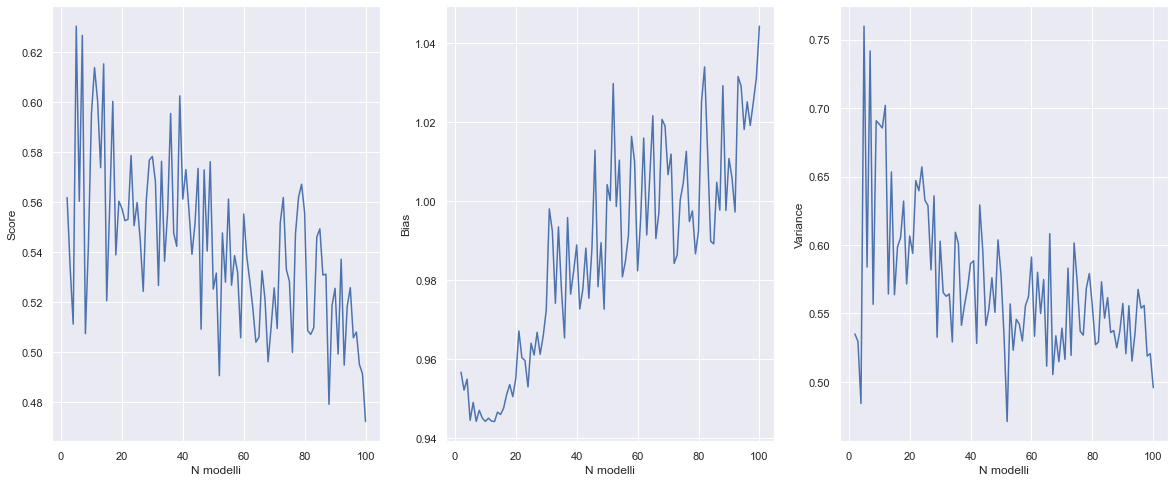

In [62]:
#AdaBoost con Standard Scaler

trasf=StandardScaler()

features = ['budget','popularity','runtime','lingua_inglese', 'release_year', "release_month","famous_director", "revenue"]
dataPred=data[features]
dataPred=pd.DataFrame(columns = dataPred.columns, data = trasf.fit_transform(dataPred))

X=dataPred.iloc[:,0:7]
y=dataPred.iloc[:,7]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

scaler = StandardScaler()
scaler.fit(x_train)

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)
df_ada_l = tuning_ada(DecisionTreeRegressor(max_leaf_nodes = 14, max_depth= 4, criterion = "mae"), 100)

N modelli    5.000000
Score        0.630488
Bias         0.944484
Variance     0.759889
Name: 3, dtype: float64


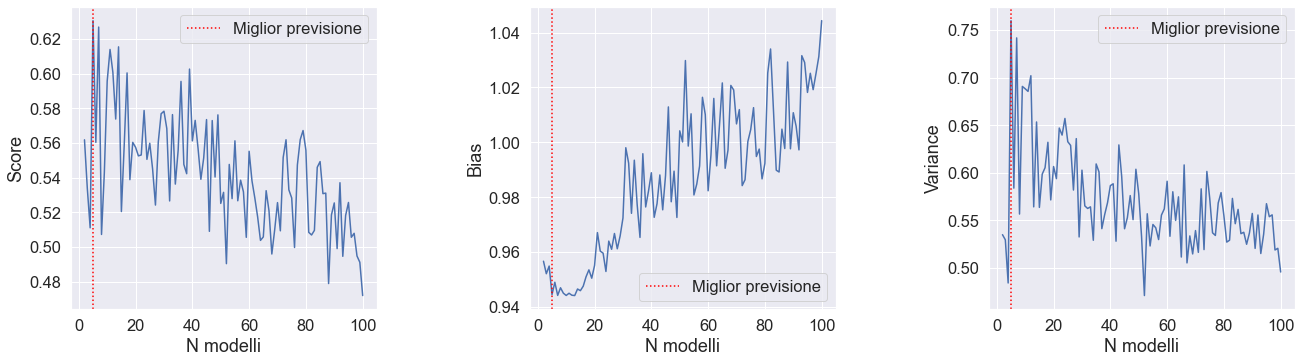

In [63]:
s_b_ada=summary_best_ada(df_ada_l, DecisionTreeRegressor(max_leaf_nodes = 14, max_depth= 4, criterion = "mae"), loss = "square")

# RAMDOM FOREST

In [64]:

from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

def tuning_rf(n, max_deep, criterion = "mse"):
    df_dt = pd.DataFrame(columns = ["N modelli", "Deep", "Score", "Bias", "Variance"]) # creo il df per tenere traccia del tuning
    for model in range(2, n + 1):
        for deep in range(1, max_deep + 1):
            rf = RandomForestRegressor(n_estimators = model, max_depth= deep, criterion = criterion)
            
            rf.fit(x_train, y_train)
            y_predict = rf.predict(x_validate)
            df_dt = df_dt.append({"N modelli" : model, "Deep" : deep,"Score" : rf.score(x_validate, y_validate), 
                                  "Bias" : np.mean((np.mean(y_predict) - y_validate)**2), "Variance" : np.var(y_predict)}, ignore_index = True)
    #plotto i grafici riguardanti il tuning
    fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(10,10))
    for i, ax in enumerate(axs[0,]):#prima riga
        sb.lineplot(ax = ax, data = df_dt, x = "N modelli", y = df_dt.columns[i + 2])
    for i, ax in enumerate(axs[1,]):#seconda riga
        sb.lineplot(ax = ax, data = df_dt, x = "Deep", y = df_dt.columns[i + 2])
        #modifica la posizione dei sotto grafici
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.05, right=1.05, hspace=0.25,
                    wspace=0.5)    
    return df_dt

In [65]:
def summary_rf_best(df_dt, criterion = "mse"):
    sb.set(font_scale = 1.5) #modifico la scala
    print(df_dt.iloc[df_dt["Score"].idxmax()]) #print del miglior tuning
    rf = RandomForestRegressor(n_estimators = int(df_dt.iloc[df_dt["Score"].idxmax()]["N modelli"]), #istanzio l'algoritmo con i parametri migliori
                               max_depth= int(df_dt.iloc[df_dt["Score"].idxmax()]["Deep"]), criterion = criterion)
    rf.fit(x_train, y_train)
    # creo il grafico per la miglior predizione
    fig = plt.figure(constrained_layout = False, figsize=(20,20)) # creo la figura
    gs = fig.add_gridspec(2,3) # creo la griglia di grafici
    ax0 = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1]),
           fig.add_subplot(gs[0, 2])] #creo asse per la prima riga
    ax1 = [fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1]),
           fig.add_subplot(gs[1, 2])] #creo asse per la seconda riga
    for i, ax in enumerate(ax0): #prima riga
        sb.lineplot(ax = ax, data = df_dt, x = "N modelli", y = df_dt.columns[i + 2])
        ax.axvline(x = int(df_dt.iloc[df_dt["Score"].idxmax()]["N modelli"]), color = "red",
                   linestyle = ":", label = "Miglior previsione")
        ax.legend()
    for i, ax in enumerate(ax1): #seconda riga
        sb.lineplot(ax = ax, data = df_dt, x = "Deep", y = df_dt.columns[i + 2])
        ax.axvline(x = int(df_dt.iloc[df_dt["Score"].idxmax()]["Deep"]), color = "red",
                   linestyle = ":", label = "Miglior previsione")
        ax.legend()

    # setta la posizione dei subplot
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.05, right=1.05, hspace=0.25,
                    wspace=0.5)
    sb.set(font_scale = 1) #riporto la scala all'originale  
    
    rf = RandomForestRegressor(n_estimators = int(df_dt.iloc[df_dt["Score"].idxmax()]["N modelli"]), #istanzio l'algoritmo con i parametri migliori
                               max_depth= int(df_dt.iloc[df_dt["Score"].idxmax()]["Deep"]), criterion = criterion)
    rf.fit(x_train, y_train)
    print(pd.DataFrame({'variable':X.columns.tolist(),
              'importance':rf.feature_importances_}).sort_values(by='importance',
                                                                 ascending=False).head(10))

In [76]:
#random forest con valori normalizzati, senza Standard Scaler


features = ["budgetLOG","runtime","popularityLOG", "release_month", "lingua_inglese","release_year","famous_director", "revenueLOG"]
dataPred=data[features]
dataPred=pd.DataFrame(columns = dataPred.columns, data = trasf.fit_transform(dataPred))

X=dataPred.iloc[:,0:7]
y=dataPred.iloc[:,7]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)



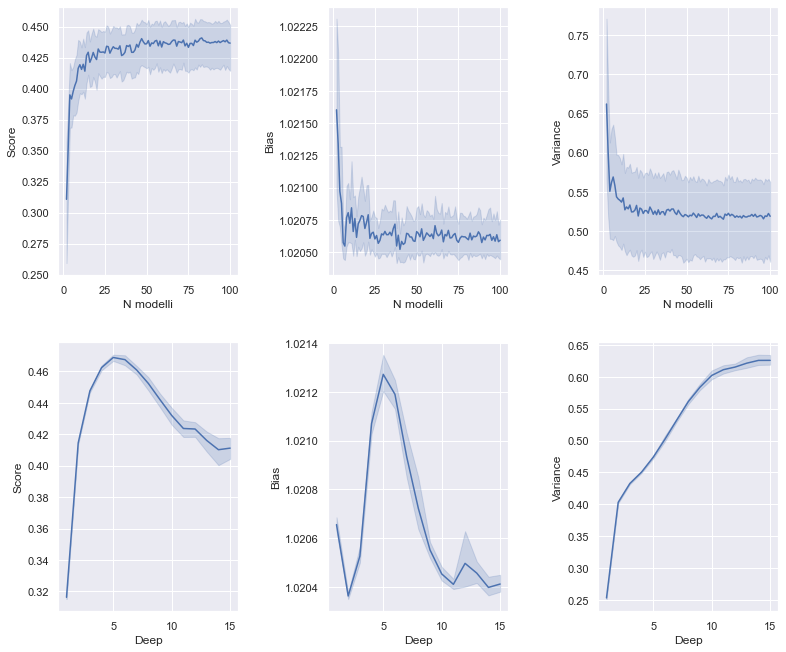

In [77]:
df_rf_mse = tuning_rf(100,15)

N modelli    9.000000
Deep         4.000000
Score        0.483345
Bias         1.021330
Variance     0.443998
Name: 108, dtype: float64
          variable  importance
0        budgetLOG    0.638496
2    popularityLOG    0.228759
5     release_year    0.093230
1          runtime    0.034270
4   lingua_inglese    0.004298
3    release_month    0.000946
6  famous_director    0.000000


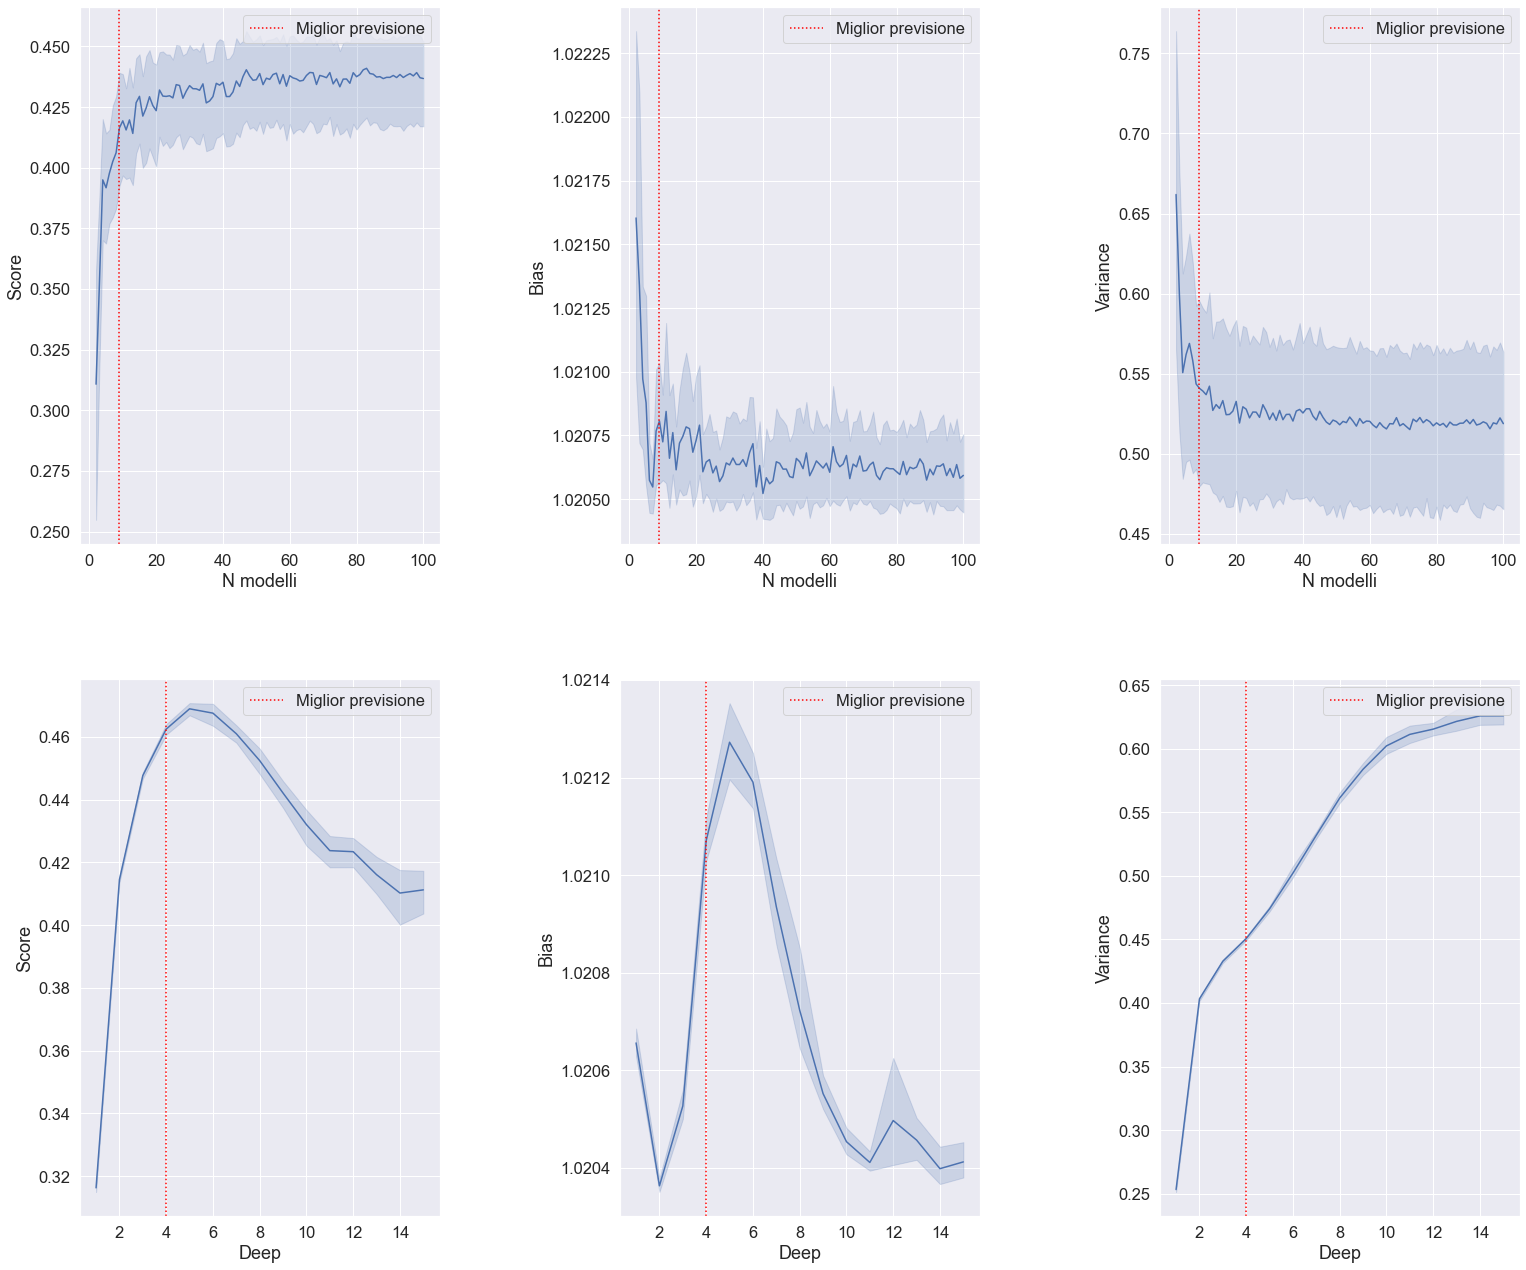

In [78]:
s_rf_best= summary_rf_best(df_rf_mse)

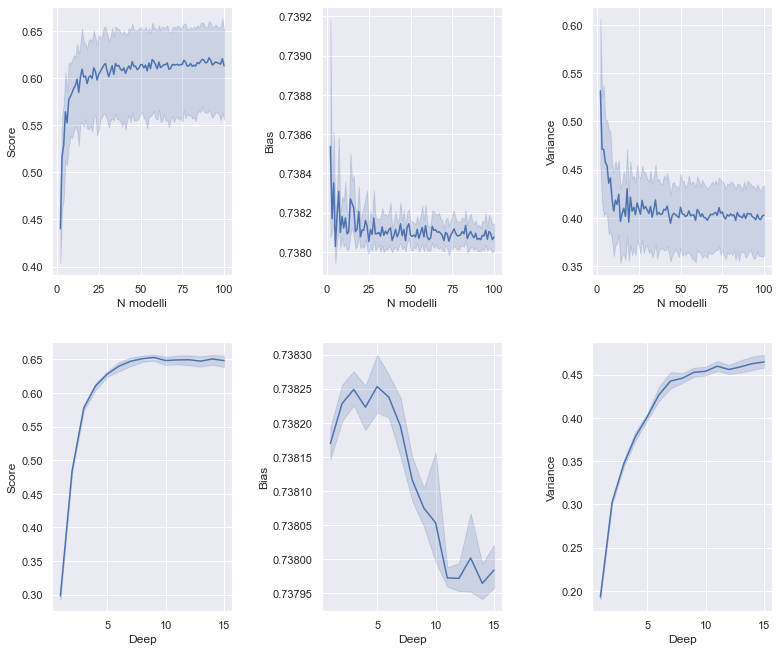

In [79]:
#random forest con standard scaler

trasf=StandardScaler()

features = ['budget','popularity','runtime','lingua_inglese', 'release_year',"release_month", "famous_director", "revenue"]
dataPred=data[features]
dataPred=pd.DataFrame(columns = dataPred.columns, data = trasf.fit_transform(dataPred))

X=dataPred.iloc[:,0:7]
y=dataPred.iloc[:,7]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

scaler = StandardScaler()
scaler.fit(x_train)

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

df_rf_mse = tuning_rf(100,15)



N modelli    16.000000
Deep         15.000000
Score         0.699972
Bias          0.738176
Variance      0.481452
Name: 224, dtype: float64
          variable  importance
0           budget    0.583662
1       popularity    0.179130
2          runtime    0.116551
4     release_year    0.064316
5    release_month    0.047503
6  famous_director    0.006700
3   lingua_inglese    0.002137


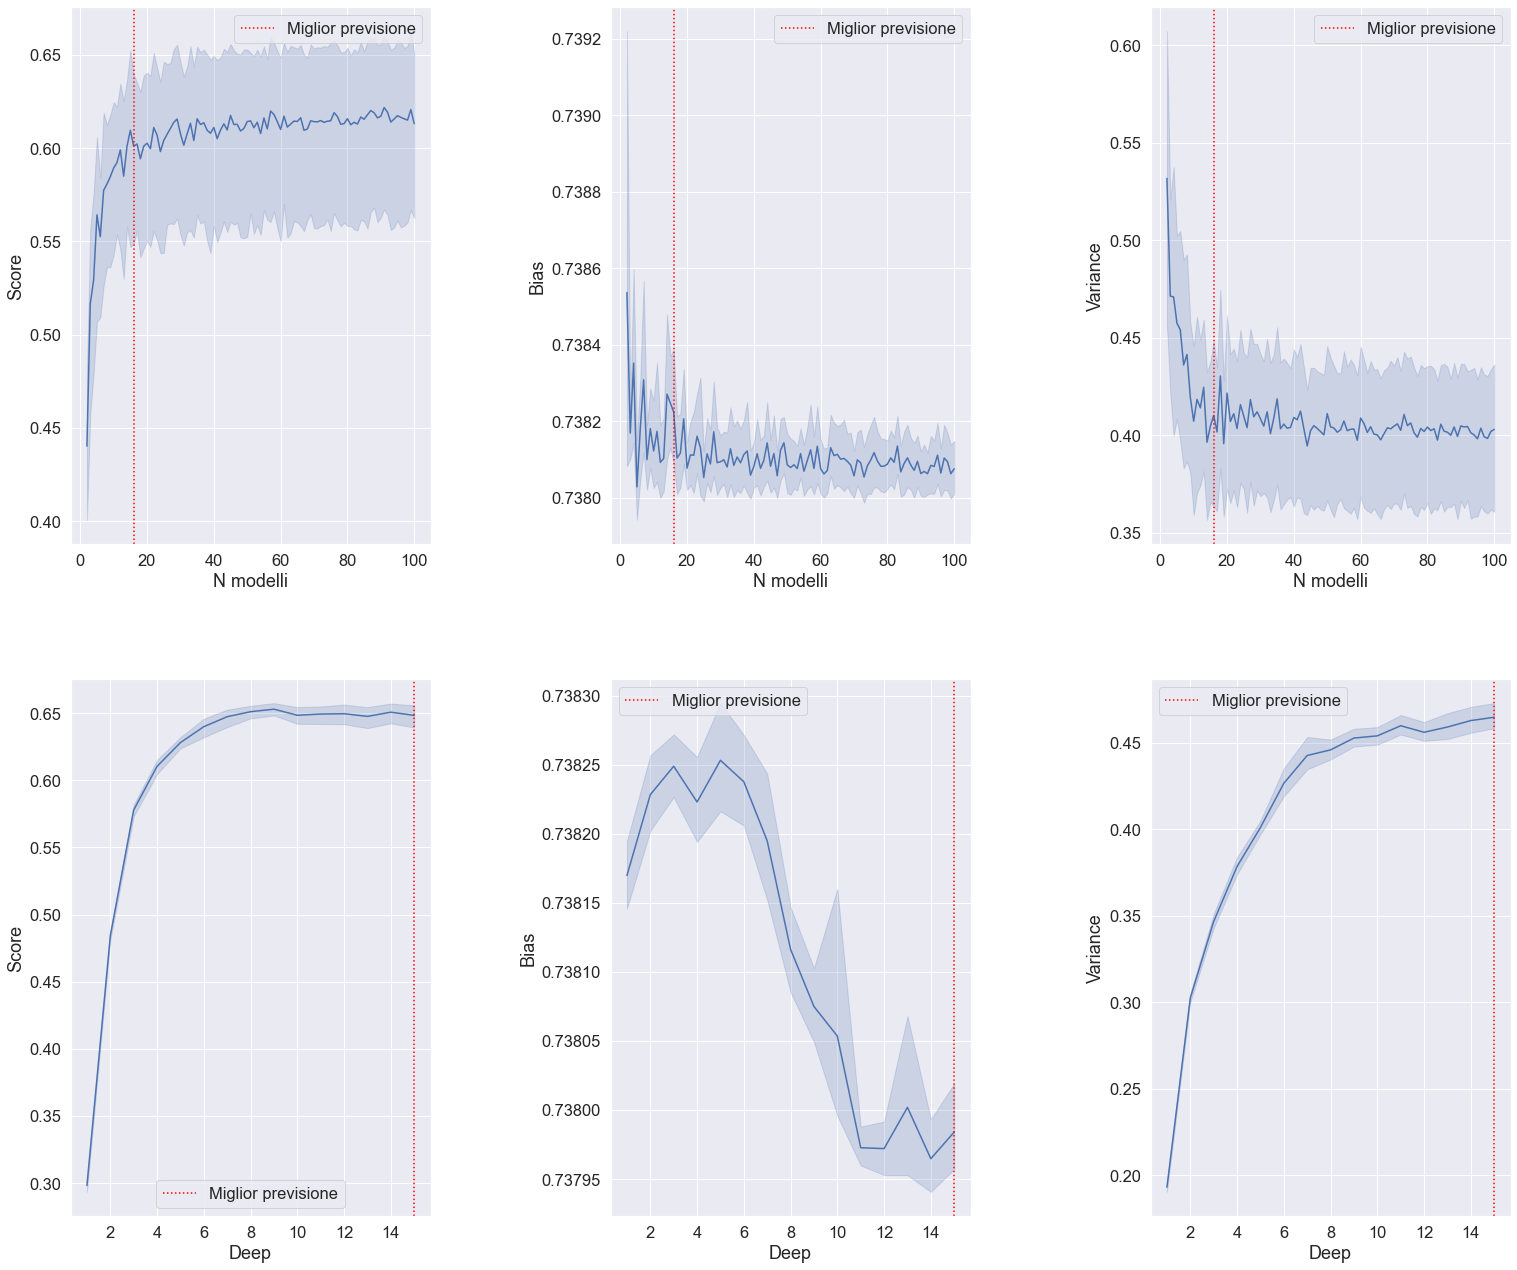

In [80]:
s_rf_best= summary_rf_best(df_rf_mse)

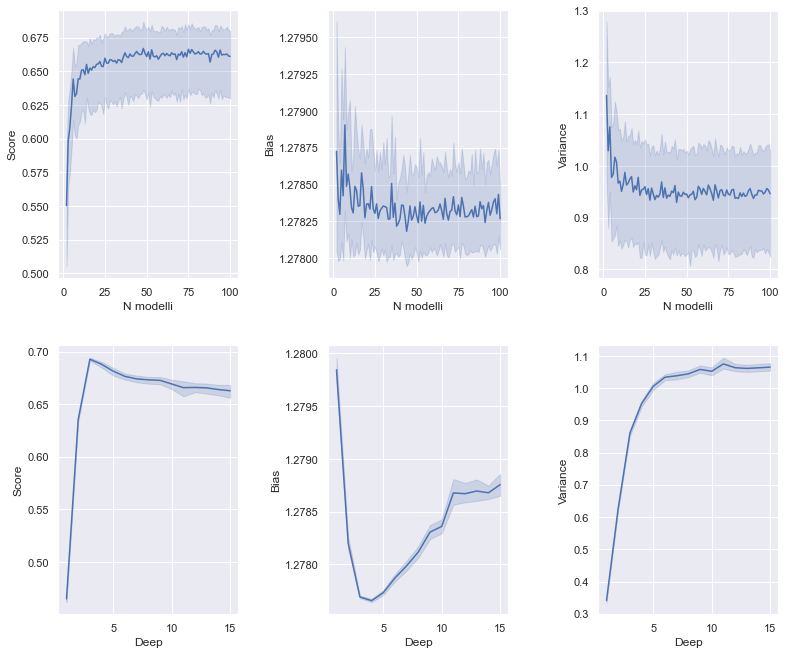

In [81]:
#random forest senza standard scaler e senza valori normalizzati


features = ['budget','popularity','runtime','lingua_inglese', 'release_year',"release_month", "famous_director", "revenue"]
dataPred=data[features]
dataPred=pd.DataFrame(columns = dataPred.columns, data = trasf.fit_transform(dataPred))

X=dataPred.iloc[:,0:7]
y=dataPred.iloc[:,7]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

df_rf_mse = tuning_rf(100,15)

N modelli    4.000000
Deep         4.000000
Score        0.707969
Bias         1.277911
Variance     1.024155
Name: 33, dtype: float64
          variable  importance
0           budget    0.667079
1       popularity    0.281851
2          runtime    0.026228
5    release_month    0.019766
4     release_year    0.005076
3   lingua_inglese    0.000000
6  famous_director    0.000000


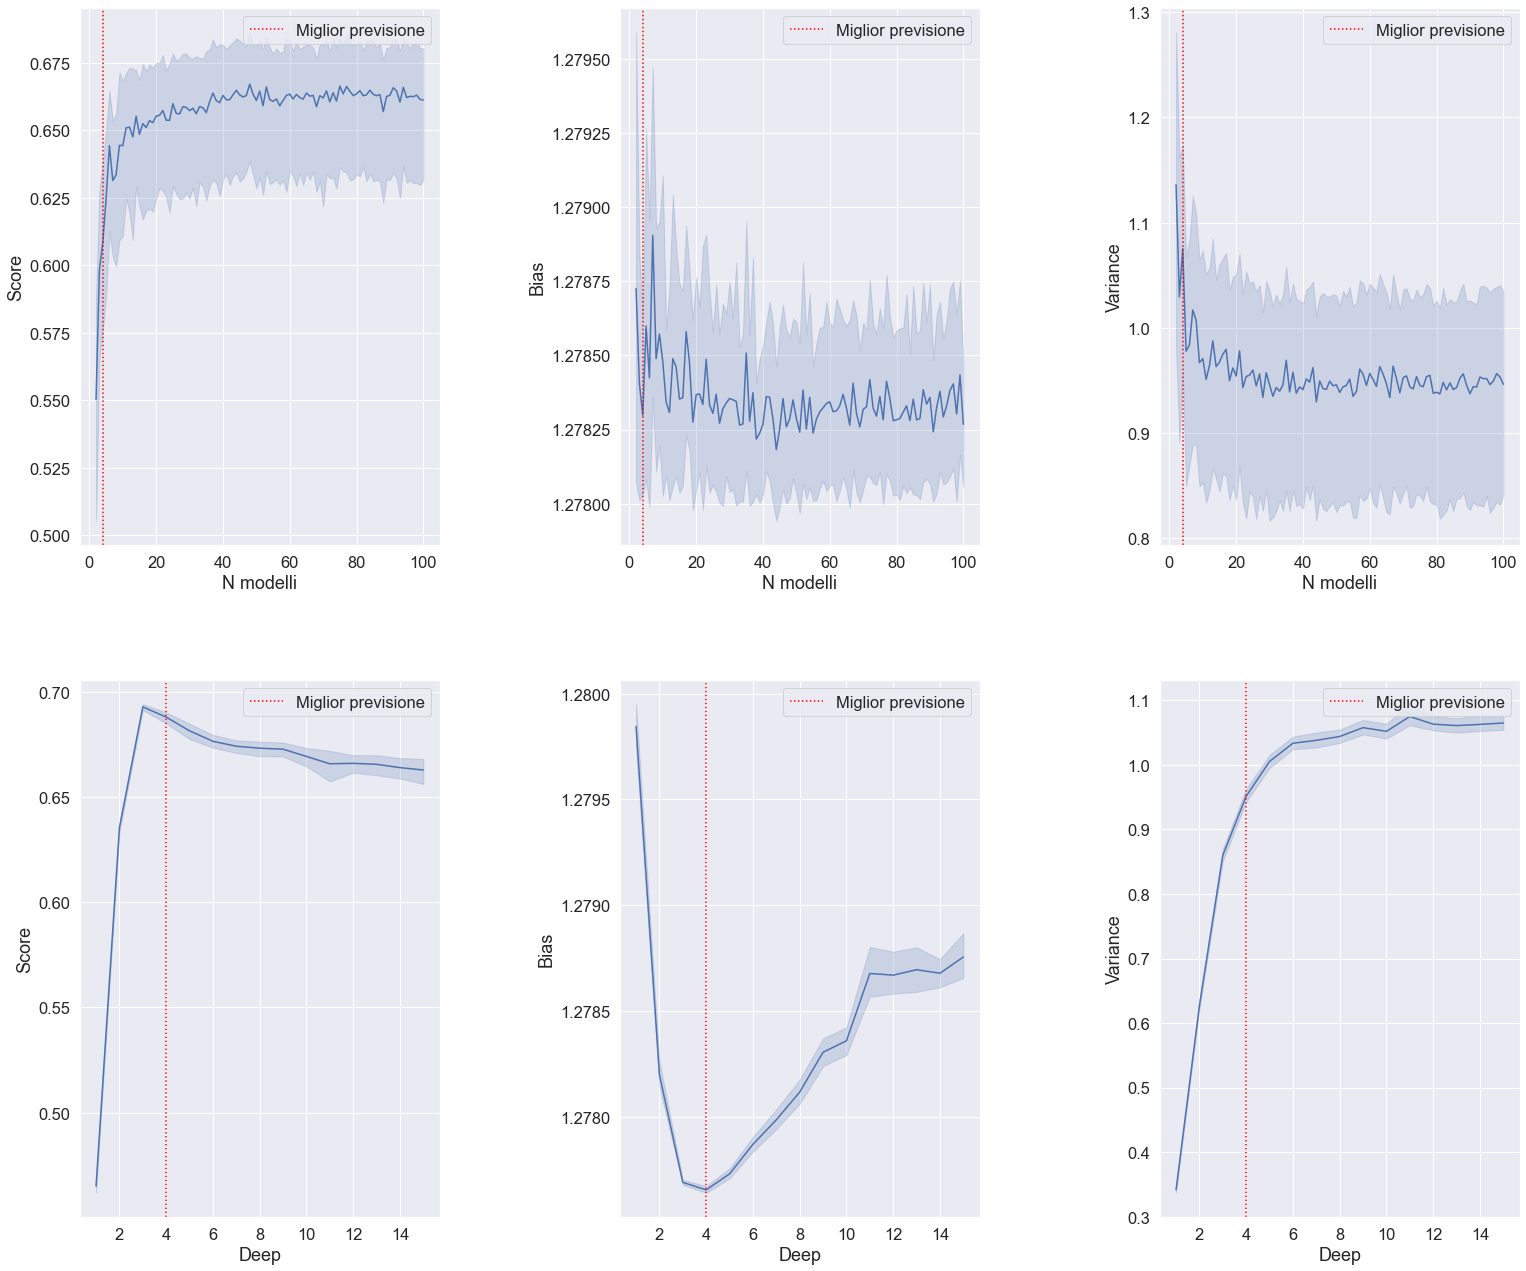

In [82]:
s_rf_best= summary_rf_best(df_rf_mse)